<class 'numpy.ndarray'>
10


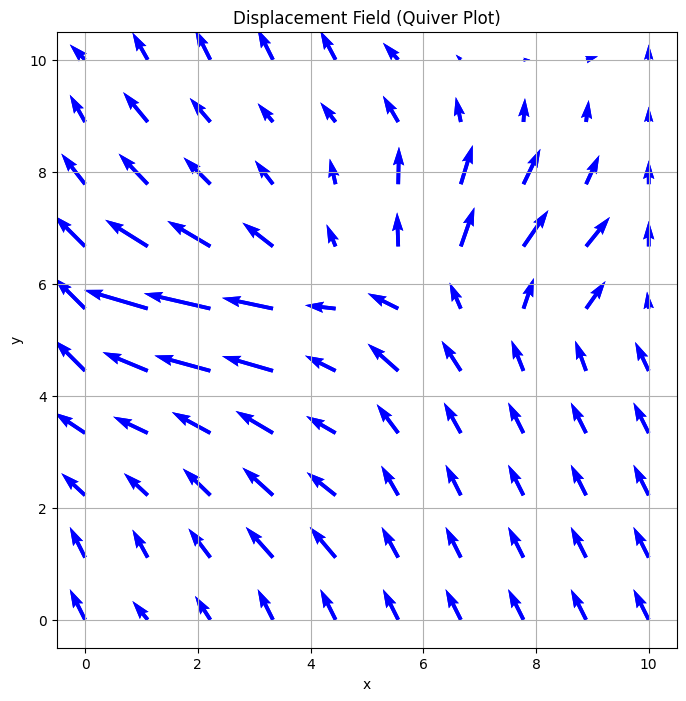

In [ ]:
from cellmech import *
from cellmech.imgproc.bead_detection import bead_image_correlation
import numpy as np
from PIL import Image
import seaborn as sns


# define all the parameters that are required to calculata traction forces
cellmechparams = CellMechParameters({
    "p" : 0.5,
    "E" : 10e3,
    "pi" : np.pi,
    "N" : 100,
    "pixel_size" : 1e-7,
    "width" :0.1 
})


# calculation of force field using gaussian
image1 = np.array(Image.open('images/beads/img7/before.png').convert('L'))
image2 = np.array(Image.open('images/beads/img7/after.png').convert('L'))
print(type(image1))
dUx, dUy = bead_image_correlation(image1, image2, 10, min_corr = 0.04)

# sns.heatmap(np.sqrt(dUx**2 + dUy**2))
# plt.title("displacement")
# plt.legend()

print(dUx.shape[0])
n = 100
x = np.linspace(0, 10, dUx.shape[0])
y = np.linspace(0, 10, dUx.shape[1])
X, Y = np.meshgrid(x, y)


# 2. Create the plot
plt.figure(figsize=(8, 8))
plt.quiver(X, Y, dUx, dUy, color='blue')
plt.quiver(X, Y, dUx, dUy, color='blue')

plt.title("Displacement Field (Quiver Plot)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


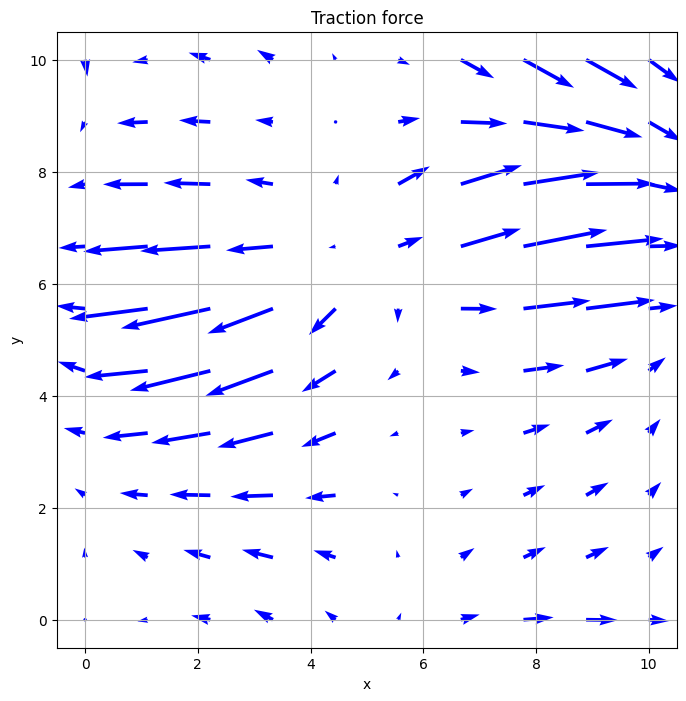

In [ ]:
displacement = 1e-6*np.stack((dUx, dUy), axis=2)
force_field  = calculate_traction_force(displacement, cellmechparams)

Fx, Fy = force_field[:, :, 0], force_field[:, :, 1]


# 2. Create the plot
plt.figure(figsize=(8, 8))
plt.quiver(X, Y, Fx, Fy, color='blue')
plt.title("Traction force")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


# sns.heatmap(Fx**2 + Fy**2)
# plt.title("tractionforc")
# plt.legend()